In [1]:
# this is a list of features
features = [
    'If an open-source project belongs to Eclipse Foundation',
    'If an open-source project is regularly scanned for vulnerable dependencies',
    'If an open-source project has a security team',
    'Number of watchers for a GitHub repository',
    'Number of contributors last three months',
    'If an open-source project has a security policy',
    'Info about vulnerabilities in open-source project',
    'Number of stars for a GitHub repository',
    'When first commit was done',
    'Number of commits last three months',
    'When a project started',
    'Security reviews for an open-source project',
    'If an open-source project belongs to Apache Foundation',
    'If an open-source project is supported by a company'
]

In [2]:
# common constants
from datetime import datetime
from datetime import timedelta

today = datetime.today()
one_year_ago = today - timedelta(days = 365)
five_years_ago = today - timedelta(days = 5 * 365)

empty = []

In [3]:
# security reviews

def security_review(when, link = '', who = ''):
    if isinstance(when, datetime):
        when = when.strftime('%Y-%m-%d')
    return {
        'when': when,
        'who': who,
        'link': link
    }

def security_reviews(entries):
    result = { 'reviews': [] }
    for entry in entries:
        result['reviews'].append(entry)
    return result

no_security_reviews = security_reviews([])

one_security_review = security_reviews([
    security_review(when = one_year_ago, link = 'https://site/proof', who = 'Wolfgang Amadeus Mozart')
])

In [4]:
# info about vulnerabilities

vuln_id_major = 123
vuln_id_minor = 1

# generates a unique vulnerability ID
def vuln_id():
    global vuln_id_major
    global vuln_id_minor
    id = 'VULN-{}-{}'.format(vuln_id_major, vuln_id_minor)
    vuln_id_major = vuln_id_major + 1
    vuln_id_minor = vuln_id_minor + 1
    return id

# creates a vulnerability with a unique ID and specified parameters
def vulnerability(description = '', cvss_version = 'v3', cvss = '', 
                  resolution = 'patched', introduced = '', fixed = ''):
    return {
        'id': vuln_id(),
        'description': description,
        'cvss': {
            'version': cvss_version.upper(),
            'value': cvss,
        },
        'introduced': introduced,
        'fixed': fixed,
        'resolution': resolution.upper(),
        'references': []
    }

def vulnerabilities(entries):
    result = { 'entries': [] }
    for entry in entries:
        result['entries'].append(entry)
    return result

no_vulnerabilities = vulnerabilities([])

all_vulnerabilities_fixed_very_fast = vulnerabilities([
    vulnerability(cvss = 9.0, introduced = '2019-01-01', fixed = '2019-01-03'),
    vulnerability(cvss = 7.0, introduced = '2018-11-28', fixed = '2018-12-02'),
    vulnerability(cvss = 3.0, introduced = '2017-07-04', fixed = '2017-07-08')
])

all_vulnerabilities_fixed_fast = vulnerabilities([
    vulnerability(cvss = 9.0, introduced = '2019-01-01', fixed = '2019-01-12'),
    vulnerability(cvss = 7.0, introduced = '2018-11-28', fixed = '2018-12-10'),
    vulnerability(cvss = 3.0, introduced = '2017-07-04', fixed = '2017-07-10')
])

all_vulnerabilities_fixed_slow = vulnerabilities([
    vulnerability(cvss = 9.0, introduced = '2019-01-01', fixed = '2019-05-02'),
    vulnerability(cvss = 7.0, introduced = '2018-11-28', fixed = '2018-12-31'),
    vulnerability(cvss = 3.0, introduced = '2017-02-04', fixed = '2017-05-28')
])

one_minor_unpatched_vulnerability = vulnerabilities([
    vulnerability(cvss = 1.0, resolution = 'unpatched')
])

one_major_unpatched_vulnerability = vulnerabilities([
    vulnerability(cvss = 5.0, resolution = 'unpatched')
])

one_critical_unpatched_vulnerability = vulnerabilities([
    vulnerability(cvss = 9.5, resolution = 'unpatched')
])

two_minor_unpatched_vulnerabilities = vulnerabilities([
    vulnerability(cvss = 1.0, resolution = 'unpatched'),
    vulnerability(cvss = 2.0, resolution = 'unpatched')
])

two_major_unpatched_vulnerabilities = vulnerabilities([
    vulnerability(cvss = 5.0, resolution = 'unpatched'),
    vulnerability(cvss = 6.0, resolution = 'unpatched')
])

two_critical_unpatched_vulnerabilities = vulnerabilities([
    vulnerability(cvss = 9.0, resolution = 'unpatched'),
    vulnerability(cvss = 10.0, resolution = 'unpatched')
])

In [5]:
import pprint

# returns a test vector (dict) with all unknown values
def all_unknown(alias, score_from = 0.0, score_to = 1.0, label = None):
    values = {
        'alias': alias, 
        'score_from': score_from, 
        'score_to': score_to, 
        'label': label
    }
    for feature in features:
        values[feature] = 'unknown'
    return values


class TestVector:
        
    def __init__(self, alias = ''):
        self.values = all_unknown(alias)
        
    def copy(self, vector):
        if not isinstance(vector, TestVector):
            raise Exception('Not a test vector! ({})'.format(type(vector)))
        for key in vector.values:
            if key == 'alias':
                continue
            self.values[key] = vector.values[key]
        return self
        
    def score_from(self, value):
        self.values['score_from'] = value
        return self
    
    def score_to(self, value):
        self.values['score_to'] = value
        return self
    
    def label(self, value):
        self.values['label'] = value
        return self
    
    def started(self, value):
        self.values['When first commit was done'] = value
        self.values['When a project started'] = value
        return self
    
    def is_not_popular_but_relatively_active(self):
        self.set('Number of contributors last three months', 20)
        self.set('Number of commits last three months', 2000)
        self.set('Number of watchers for a GitHub repository', 7)
        self.set('Number of stars for a GitHub repository', 89)
        return self
        
    def is_popular_and_active(self):
        self.values['Number of contributors last three months'] = 50
        self.values['Number of commits last three months'] = 1000
        self.values['Number of watchers for a GitHub repository'] = 5000
        self.values['Number of stars for a GitHub repository'] = 15000
        return self

    def cares_about_security(self):
        self.values['If an open-source project is regularly scanned for vulnerable dependencies'] = True
        self.values['If an open-source project has a security policy'] = True
        self.values['If an open-source project has a security team'] = True
        self.values['Security reviews for an open-source project'] = one_security_review
        return self
    
    def no_security_controls(self):
        self.values['If an open-source project is regularly scanned for vulnerable dependencies'] = False
        self.values['If an open-source project has a security policy'] = False
        self.values['If an open-source project has a security team'] = False
        self.values['Security reviews for an open-source project'] = no_security_reviews
        return self
    
    def not_apache_or_eclipse(self):
        self.values['If an open-source project belongs to Eclipse Foundation'] = False
        self.values['If an open-source project belongs to Apache Foundation'] = False
        return self
    
    def not_supported_by_company(self):
        self.values['If an open-source project is supported by a company'] = False
        return self
    
    def vulnerabilities(self, value):
        self.values['Info about vulnerabilities in open-source project'] = value
        return self
    
    def security_reviews(self, value):
        self.values['Security reviews for an open-source project'] = value
        return self
    
    def set(self, feature, value):
        self.values[feature] = value
        return self
    
    def make(self):
        return self.values
    
# this is raw data for test vectors
data = []
    
alias_counter = 0
    
# register a test vector
def register(test_vector, pretty=False):
    global data
    global alias_counter
    if isinstance(test_vector, dict):
        values = test_vector
    elif isinstance(test_vector, TestVector):
        values = test_vector.make()
    else:
        raise Exception('Unexpected object: {}'.format(type(test_vector)))
    if 'alias' not in values or values['alias'] == None or values['alias'] == '':
        values['alias'] = 'test_vector_{}'.format(alias_counter)
        alias_counter = alias_counter + 1
    data.append(values)
    print('registered: {}'.format(values['alias']))
    if pretty:
        pprint.PrettyPrinter(indent=4, depth=1).pprint(values)

In [6]:
all_unknown_values = (TestVector()
                           .score_from(0.0)
                           .score_to(0.1)
                           .label('BAD')
                      )
register(all_unknown_values)

registered: test_vector_0


In [7]:
very_bad = (TestVector()
                .copy(all_unknown_values)
                .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
                .set('If an open-source project belongs to Eclipse Foundation', False)
                .set('If an open-source project belongs to Apache Foundation', False)
                .set('If an open-source project is supported by a company', False)
                .set('If an open-source project has a security policy', False)
                .set('If an open-source project has a security team', False)
                .set('Info about vulnerabilities in open-source project', one_critical_unpatched_vulnerability)
                .set('Number of contributors last three months', 1)
                .set('Number of commits last three months', 5)
                .set('Number of watchers for a GitHub repository', 0)
                .set('Number of stars for a GitHub repository', 2)
                .set('When first commit was done', five_years_ago)
                .set('When a project started', five_years_ago)
                .set('Security reviews for an open-source project', no_security_reviews)
                .score_from(0.0)
                .score_to(1.0)
                .label('BAD')
           )

register(very_bad)

registered: test_vector_1


In [8]:
very_good = (TestVector()
                 .set('If an open-source project is regularly scanned for vulnerable dependencies', True)
                 .set('If an open-source project belongs to Eclipse Foundation', False)
                 .set('If an open-source project belongs to Apache Foundation', False)
                 .set('If an open-source project is supported by a company', True)
                 .set('If an open-source project has a security policy', True)
                 .set('If an open-source project has a security team', True)
                 .set('Info about vulnerabilities in open-source project', all_vulnerabilities_fixed_very_fast)
                 .set('Number of contributors last three months', 50)
                 .set('Number of commits last three months', 1000)
                 .set('Number of watchers for a GitHub repository', 5000)
                 .set('Number of stars for a GitHub repository', 15000)
                 .set('When first commit was done', five_years_ago)
                 .set('When a project started', five_years_ago)
                 .set('Security reviews for an open-source project', one_security_review)
                 .score_from(9.0)
                 .score_to(10.0)
                 .label('GOOD')
            )

register(very_good)

register(
    TestVector()
        .copy(very_good)
        .set('If an open-source project belongs to Apache Foundation', True)
        .score_from(9.0)
        .score_to(10.0)
        .label('GOOD')
)

register(
    TestVector()
        .copy(very_good)
        .set('If an open-source project belongs to Eclipse Foundation', True)
        .score_from(9.0)
        .score_to(10.0)
        .label('GOOD')
)

registered: test_vector_2
registered: test_vector_3
registered: test_vector_4


In [9]:
base_vector = (TestVector()
                   .is_popular_and_active()
                   .not_apache_or_eclipse()
                   .started(five_years_ago)
                   .not_supported_by_company()
              )

# very good, cares about security, but not supported by any known organization
register(
    TestVector()
        .copy(base_vector)
        .cares_about_security()
        .vulnerabilities(no_vulnerabilities)
        .score_from(8.0)
        .score_to(10.0)
        .label('GOOD')
        .make()
)

# very good, cares about security, but not supported by any known organization 
# and fixes vulnerabilities fast
register(
    TestVector()
        .copy(base_vector)
        .cares_about_security()
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .score_from(8.0)
        .score_to(10.0)
        .label('GOOD')
        .make()
)

# very good, cares about security, but not supported by any known organization 
# and patched vulnerabilities slowly
register(
    TestVector()
        .copy(base_vector)
        .cares_about_security()
        .vulnerabilities(all_vulnerabilities_fixed_slow)
        .score_from(6.0)
        .score_to(8.5)
        .make()
)

# active and popular but doesn't implement any security control
# patches vulnerabilities fast
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .no_security_controls()
        .score_from(4.0)
        .score_to(7.0)
        .make()
)

registered: test_vector_5
registered: test_vector_6
registered: test_vector_7
registered: test_vector_8


In [10]:
base_vector = (TestVector()
                   .is_popular_and_active()
                   .not_apache_or_eclipse()
                   .started(five_years_ago)
                   .not_supported_by_company()
                   .no_security_controls()
              )

# active and popular but doesn't implement any security control
# has no vulnerability history
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .score_from(4.0)
        .score_to(6.0)
        .make()
)

# active and popular but doesn't implement any security control patched vulnerabilities slowly
register(    
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_slow)
        .score_from(4.0)
        .score_to(6.0)
        .make()
)
    
# active and popular but doesn't implement any security control 
# and has one minor unpatched vulnerability
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(one_minor_unpatched_vulnerability)
        .score_from(3.0)
        .score_to(5.0)
        .make()
)
    
# active and popular but doesn't implement any security control 
# and has one major unpatched vulnerability
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(one_major_unpatched_vulnerability)
        .score_from(2.0)
        .score_to(4.0)
        .make()
)

# active and popular but doesn't implement any security control
# and has two major unpatched vulnerabilities
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_major_unpatched_vulnerabilities)
        .score_from(1.0)
        .score_to(3.1)
        .make()
)
    
# active and popular but doesn't implement any security control
# and has one critical unpatched vulnerability
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(one_critical_unpatched_vulnerability)
        .score_from(0.0)
        .score_to(2.5)
        .make()
)

registered: test_vector_9
registered: test_vector_10
registered: test_vector_11
registered: test_vector_12
registered: test_vector_13
registered: test_vector_14


In [11]:
base_vector = (TestVector()
                   .set('Number of contributors last three months', 2)
                   .set('Number of commits last three months', 500)
                   .set('Number of watchers for a GitHub repository', 2)
                   .set('Number of stars for a GitHub repository', 23)
                   .not_apache_or_eclipse()
                   .not_supported_by_company()
                   .started(five_years_ago)
                   .cares_about_security()
              )

# not popular, but active and cares about security, 
# no vulnerability history
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .score_from(7.0)
        .score_to(9.0)
        .make()
)

# not popular, but active and cares about security, 
# all vulnerabilities patched fast
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .score_from(7.9)
        .score_to(9.0)
        .make()
)

# not popular, but active and cares about security, 
# all vulnerabilities patched slowly
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_slow)
        .score_from(7.0)
        .score_to(8.0)
        .make()
)

registered: test_vector_15
registered: test_vector_16
registered: test_vector_17


In [12]:
base_vector = (TestVector()
                   .set('Number of contributors last three months', 2)
                   .set('Number of commits last three months', 500)
                   .set('Number of watchers for a GitHub repository', 2)
                   .set('Number of stars for a GitHub repository', 23)
                   .not_apache_or_eclipse()
                   .not_supported_by_company()
                   .started(five_years_ago)
              )

# not popular, but active and somehow cares about security
# (has security policy), all vulnerabilities fixed fast
register(
    TestVector()
        .copy(base_vector)
        .set('If an open-source project has a security policy', True)
        .set('If an open-source project has a security team', True)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .security_reviews(no_security_reviews)
        .score_from(5.0)
        .score_to(7.0)
        .make()
)

# not popular, but active and somehow cares about security
# (has security policy), all vulnerabilities fixed slow
register(
    TestVector()
        .copy(base_vector)
        .set('If an open-source project has a security policy', True)
        .set('If an open-source project has a security team', True)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
        .vulnerabilities(all_vulnerabilities_fixed_slow)
        .security_reviews(no_security_reviews)
        .score_from(4.0)
        .score_to(7.0)
        .make()
)

# not popular, but active and somehow cares about security
# (scans for vulnerable dependencies)
register(
    TestVector()
        .copy(base_vector)
        .set('If an open-source project has a security policy', False)
        .set('If an open-source project has a security team', False)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', True)
        .vulnerabilities(no_vulnerabilities)
        .security_reviews(no_security_reviews)
        .score_from(4.0)
        .score_to(6.5)
        .make()
)

# not popular, but active and somehow cares about security
# (one security review done)
register(
    TestVector()
        .copy(base_vector)
        .set('If an open-source project has a security policy', False)
        .set('If an open-source project has a security team', False)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
        .vulnerabilities(no_vulnerabilities)
        .security_reviews(one_security_review)
        .score_from(4.5)
        .score_to(6.5)
        .make()
)

registered: test_vector_18
registered: test_vector_19
registered: test_vector_20
registered: test_vector_21


In [13]:
base_vector = (TestVector()
                   .is_not_popular_but_relatively_active()
                   .not_apache_or_eclipse()
                   .not_supported_by_company()
                   .started(five_years_ago)
                   .no_security_controls()
              )

# not popular, but active although doesn't cares about security,
# no vulnerability history
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .score_from(2.5)
        .score_to(5.0)
        .make()
)

# not popular, but active although doesn't cares about security,
# all vulnerabilities patched slowly
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_slow)
        .score_from(3.0)
        .score_to(5.0)
        .make()
)

# not popular, but active although doesn't cares about security,
# and has two minor unpatched vulnerabilities
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_minor_unpatched_vulnerabilities)
        .score_from(2.5)
        .score_to(5.0)
        .make()
)

# not popular, but active although doesn't cares about security,
# and has one major unpatched vulnerabilities
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_major_unpatched_vulnerabilities)
        .score_from(2.5)
        .score_to(5.0)
        .make()
)

# not popular, but active although doesn't cares about security,
# and has one critical unpatched vulnerability
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(one_critical_unpatched_vulnerability)
        .score_from(1.0)
        .score_to(3.0)
        .label('BAD')
        .make()
)

# not popular, but active although doesn't cares about security,
# and has two critical unpatched vulnerabilities
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_critical_unpatched_vulnerabilities)
        .score_from(0.0)
        .score_to(2.0)
        .label('BAD')
        .make()
)

registered: test_vector_22
registered: test_vector_23
registered: test_vector_24
registered: test_vector_25
registered: test_vector_26
registered: test_vector_27


In [14]:
base_vector = (TestVector()
                   .is_not_popular_but_relatively_active()
                   .not_apache_or_eclipse()
                   .not_supported_by_company()
                   .started(five_years_ago)
              )

# not popular, but active although cares about security a little bit
# (has security policy), vulnerabilities are patched slow
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_slow)
        .security_reviews(no_security_reviews)
        .set('If an open-source project has a security policy', True)
        .set('If an open-source project has a security team', False)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
        .score_from(4.0)
        .score_to(6.0)
        .make()
)

# not popular, but active although cares about security a little bit
# (has security policy), vulnerabilities are patched fast
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .security_reviews(no_security_reviews)
        .set('If an open-source project has a security policy', True)
        .set('If an open-source project has a security team', False)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
        .score_from(4.5)
        .score_to(6.0)
        .make()
)

# not popular, but active although cares about security a little bit
# (has a security team)
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .security_reviews(no_security_reviews)
        .set('If an open-source project has a security policy', False)
        .set('If an open-source project has a security team', True)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
        .score_from(4.0)
        .score_to(5.5)
        .make()
)

# not popular, but active although cares about security a little bit
# (scans for vulnerable dependencies)
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .security_reviews(no_security_reviews)
        .set('If an open-source project has a security policy', False)
        .set('If an open-source project has a security team', False)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', True)
        .score_from(4.0)
        .score_to(6.0)
        .make()
)

# not popular, but active although cares about security a little bit
# (done one security review)
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .security_reviews(one_security_review)
        .set('If an open-source project has a security policy', False)
        .set('If an open-source project has a security team', False)
        .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
        .score_from(4.0)
        .score_to(6.5)
        .make()
)

registered: test_vector_28
registered: test_vector_29
registered: test_vector_30
registered: test_vector_31
registered: test_vector_32


In [15]:
base_vector = (TestVector()
                    .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
                    .set('If an open-source project belongs to Eclipse Foundation', False)
                    .set('If an open-source project belongs to Apache Foundation', True)
                    .set('If an open-source project is supported by a company', False)
                    .set('If an open-source project has a security policy', True)
                    .set('If an open-source project has a security team', True)
                    .set('Number of contributors last three months', 42)
                    .set('Number of commits last three months', 1000)
                    .set('Number of watchers for a GitHub repository', 1000)
                    .set('Number of stars for a GitHub repository', 10000)
                    .set('When first commit was done', five_years_ago)
                    .set('When a project started', five_years_ago)
                    .set('Security reviews for an open-source project', no_security_reviews)
              )
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .score_from(6.0)
        .score_to(9.0)
        .make()
)

register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .score_from(4.5)
        .score_to(7.0)
        .make()
)

register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_slow)
        .score_from(5.0)
        .score_to(7.0)
        .make()
)

register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_minor_unpatched_vulnerabilities)
        .score_from(4.5)
        .score_to(7.0)
        .make()
)

register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_major_unpatched_vulnerabilities)
        .score_from(2.0)
        .score_to(5.5)
        .make()
)

register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_critical_unpatched_vulnerabilities)
        .score_from(0.0)
        .score_to(3.5)
        .make()
)

registered: test_vector_33
registered: test_vector_34
registered: test_vector_35
registered: test_vector_36
registered: test_vector_37
registered: test_vector_38


In [16]:
import pandas as pd
import numpy as np

# checks if two vectors have the same values
def check_same_values(first, second):
    found = False
    for key in first:
        if key in ['alias', 'score_from', 'score_to', 'label']:
            continue
        if key not in second:
            raise Exception('Missing feature: {}'.format(key))
        if first[key] != second[key]:
            found = True
    if not found:
        raise Exception('{} and {} are duplicates'.format(first['alias'], second['alias']))

# checks duplicate vectors
def check_duplicates(vector):
    global data
    for another in data:
        if vector['alias'] != another['alias']:
            check_same_values(vector, another)
        

# check if all test vectors have all required fields
aliases = set()
for vector in data:
    if 'alias' not in vector: 
        raise Exception('Missing alias!')
    if vector['alias'] in aliases:
        raise Exception('Duplicate alias "{}"!'.format(vector['alias']))
    aliases.add(vector['alias'])
    if 'score_from' not in vector:
        raise Exception('Missing score_from!')
    if vector['score_from'] < 0 or vector['score_from'] > 10:
        raise Exception('Wrong score_from!')
    if vector['score_to'] < 0 or vector['score_to'] > 10:
        raise Exception('Wrong score_to!')
    if vector['score_from'] >= vector['score_to']:
        raise Exception('score_from is greater than score_to!')
    if 'score_to' not in vector:
        raise Exception('Missing score_to!')
    for feature in features:
        if feature not in vector:
            raise Exception('Missing feature "{}"'.format(feature))
    check_duplicates(vector)

# define test vectors
test_vectors = pd.DataFrame(data)

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/rating/oss/OssSecurityRatingTestVectors.csv'
test_vectors.to_csv(filename)

# simplify the test vectors for calculating statistics
simplified_test_vectors = test_vectors.drop(columns=[
    'alias', 
    'label', 
    'Info about vulnerabilities in open-source project', 
    'Security reviews for an open-source project'])

# print out the simplified test vectors
simplified_test_vectors

,score_from,score_to,If an open-source project belongs to Eclipse Foundation,If an open-source project is regularly scanned for vulnerable dependencies,If an open-source project has a security team,Number of watchers for a GitHub repository,Number of contributors last three months,If an open-source project has a security policy,Number of stars for a GitHub repository,When first commit was done,Number of commits last three months,When a project started,If an open-source project belongs to Apache Foundation,If an open-source project is supported by a company
0,0.0,0.1,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,0.0,1.0,False,False,False,0,1,False,2,2015-01-04 11:16:00.710392,5,2015-01-04 11:16:00.710392,False,False
2,9.0,10.0,False,True,True,5000,50,True,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,False,True
3,9.0,10.0,False,True,True,5000,50,True,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,True,True
4,9.0,10.0,True,True,True,5000,50,True,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,False,True
5,8.0,10.0,False,True,True,5000,50,True,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,False,False
6,8.0,10.0,False,True,True,5000,50,True,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,False,False
7,6.0,8.5,False,True,True,5000,50,True,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,False,False
8,4.0,7.0,False,False,False,5000,50,False,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,False,False
9,4.0,6.0,False,False,False,5000,50,False,15000,2015-01-04 11:16:00.710392,1000,2015-01-04 11:16:00.710392,False,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3330de780>,
      dtype=object)

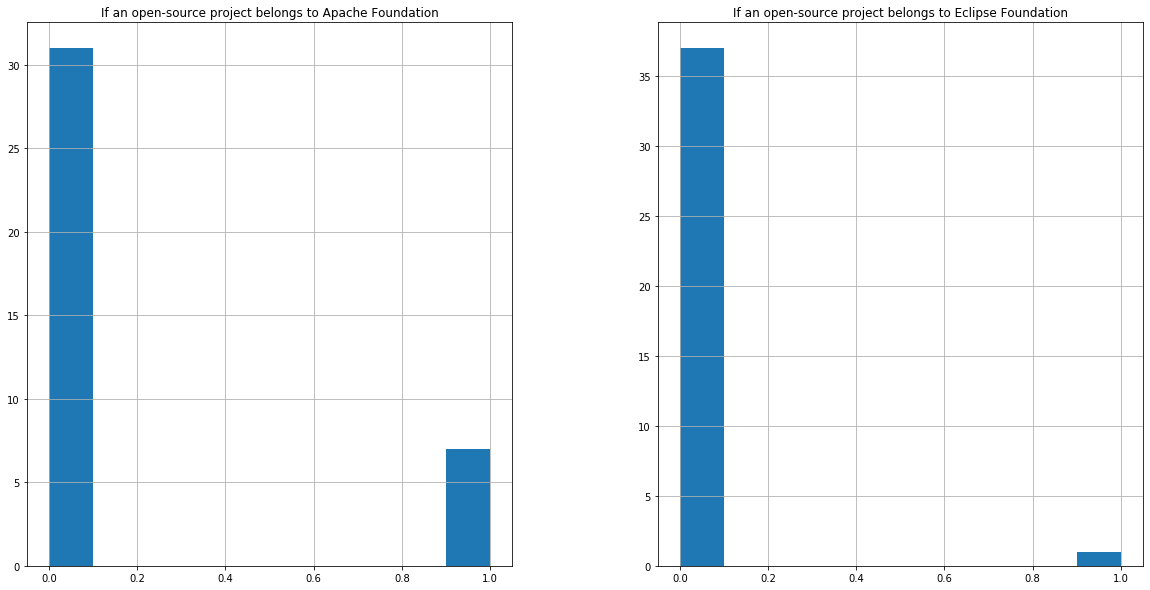

In [17]:
tmp = (simplified_test_vectors
                .drop(columns=['When first commit was done', 'When a project started'])
                .replace({'unknown': np.NaN, False: 0, True: 1}))
tmp.hist(
    column=[
        'If an open-source project belongs to Apache Foundation', 
        'If an open-source project belongs to Eclipse Foundation',
    ], 
    figsize=(20, 10))

# TODO: create histograms for more columns
# TODO: add other statistics

In [18]:
# tune the rating
!cd ../../../../../ && \
    java \
        -classpath target/fosstars-github-rating-calc.jar \
        com.sap.sgs.phosphor.fosstars.model.rating.oss.OssSecurityRatingCMAES

INFO : Hooray! Found a better value of the fitness function!
INFO : Fitness function = 324.85286948771864, failed 3 test vectors: #1, #38, #37
INFO : Algorithm parameters:
INFO :     max iterations = 100
INFO :     samples per iteration = 4
INFO :     candidate samples per iteration = 10
INFO :     step = 0.1
INFO : Hooray! Found a better value of the fitness function!
INFO : Fitness function = 21.77628623194519, failed 0 test vectors: 
INFO : Algorithm parameters:
INFO :     max iterations = 100
INFO :     samples per iteration = 4
INFO :     candidate samples per iteration = 50
INFO :     step = 0.1
INFO : Found a solution which passes all test vectors
INFO : Weights:
INFO :     0.54 -> How well open-source community commits to support an open-source project
INFO :     0.22 -> Open-source project activity score
INFO :     1.00 -> How well vulnerabilities are patched
INFO :     1.00 -> How well security testing is done for an open-source project
INFO :     0.12 -> How fast vulnerabili